In [41]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/gonzamonas/anaconda3/envs/tp2/bin/python (found version "3.6.5") 
-- Found PythonLibs: /home/gonzamonas/anaconda3/envs/tp2/lib/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/gonzamonas/Desktop/mn_tp2/tp2
-- Configur

In [42]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/home/gonzamonas/Desktop/mn_tp2/tp2/notebooks
Python 3.6.5 :: Anaconda, Inc.


In [43]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_train_orig = pd.read_csv("../data/train.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from tqdm import tqdm



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_train_orig = pd.read_csv("../data/train.csv")


In [31]:
import time
from tqdm import tqdm
from sklearn.metrics import accuracy_score


alpha = 18
tamanos = [1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000]
tiempos_pca = []
acc_pca = []
df_train_orig = pd.read_csv("../data/train.csv")

for tamano in tqdm(tamanos):
    start = time.time()

    df_train = df_train_orig[:tamano]

    X = df_train[df_train.columns[1:]].values
    y = df_train["label"].values.reshape(-1, 1)
    
    PCA_call = metnum.PCA(alpha)
    PCA_call.fit(X)
    X = PCA_call.transform(X)


    limit = int(0.8 * X.shape[0]) 

    X_train, y_train = X[:limit], y[:limit]
    X_val, y_val = X[limit:], y[limit:]

    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)

    clf = metnum.KNNClassifier(3)

    clf.fit(X_train, y_train.ravel())

    y_pred = clf.predict(X_val)

    end = time.time()
    
    acc_pca.append(accuracy_score(y_val, y_pred))

    tiempos_pca.append(end-start)




100%|██████████| 9/9 [01:18<00:00,  8.75s/it]


In [36]:
from tqdm import tqdm
import time
from sklearn.metrics import accuracy_score


tamanos = [1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000]
tiempos_knn = []
acc_knn = []

for i in tqdm(tamanos):
    
    start = time.time()
        

    df_train = df_train_orig[:i]

    X = df_train[df_train.columns[1:]].values
    y = df_train["label"].values.reshape(-1, 1)

    limit = int(0.8 * X.shape[0]) 

    X_train, y_train = X[:limit], y[:limit]
    X_val, y_val = X[limit:], y[limit:]

    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)

    clf = metnum.KNNClassifier(3)

    clf.fit(X_train, y_train.ravel())

    y_pred = clf.predict(X_val)

    end = time.time()

    acc_knn.append(accuracy_score(y_val, y_pred))
    
    tiempos_knn.append(end-start)
    

100%|██████████| 9/9 [09:14<00:00, 61.65s/it] 


In [ ]:
line_styles = ['b.-', 'r.-', 'g.-', 'k.-', 'y.-', 'm.-']
tamanos = [1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000]


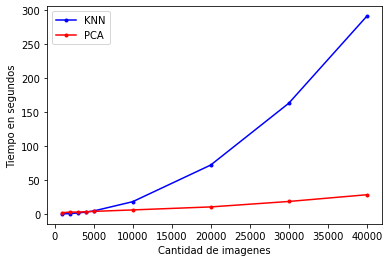

In [31]:
line_styles = ['b.-', 'r.-', 'g.-', 'k.-', 'y.-', 'm.-']

tamanos = [1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000]

import matplotlib.pyplot as plt
plt.plot(tamanos, tiempos_knn, line_styles[0])
plt.plot(tamanos, tiempos_pca, line_styles[1])
plt.gca().legend(['KNN','PCA'])
plt.ylabel("Tiempo en segundos")
plt.xlabel("Cantidad de imagenes")

plt.savefig("Tiempo_Knn_Pca.png")


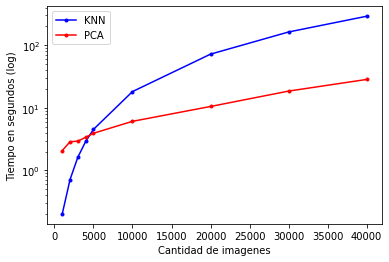

In [27]:
import matplotlib.pyplot as plt
plt.plot(tamanos, tiempos_knn, line_styles[0])
plt.plot(tamanos, tiempos_pca, line_styles[1])
plt.gca().legend(['KNN','PCA'])
plt.yscale('log')
plt.ylabel("Tiempo en segundos (log)")
plt.xlabel("Cantidad de imagenes")

plt.savefig("Tiempo_Knn_Pca_log.png")


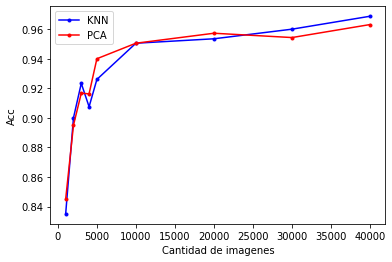

In [32]:
line_styles = ['b.-', 'r.-', 'g.-', 'k.-', 'y.-', 'm.-']

line_styles = ['b.-', 'r.-', 'g.-', 'k.-', 'y.-', 'm.-']

tamanos = [1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000]


import matplotlib.pyplot as plt
#plt.plot(tamanos,acc_knn, label="knn")
#plt.plot(tamanos,acc_pca, label="pca")
#plt.ylabel("Acc")

plt.plot(tamanos,acc_knn, line_styles[0])
plt.plot(tamanos,acc_pca, line_styles[1])
plt.gca().legend(['KNN','PCA'])

plt.ylabel("Acc")
plt.xlabel("Cantidad de imagenes")

plt.savefig("Acc_Knn_Pca.png")

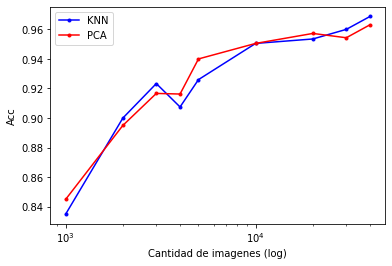

In [23]:

import matplotlib.pyplot as plt
#plt.plot(tamanos,acc_knn, label="knn")
#plt.plot(tamanos,acc_pca, label="pca")
#plt.ylabel("Acc")

plt.plot(tamanos,acc_knn, line_styles[0])
plt.plot(tamanos,acc_pca, line_styles[1])
plt.gca().legend(['KNN','PCA'])
plt.xscale('log')

plt.ylabel("Acc")
plt.xlabel("Cantidad de imagenes (log)")

plt.savefig("Acc_Knn_Pca_log.png")